# Functionality of the Code

The three changes from the second code are:
1. Addition of Dropout
2. Change of Optimizer from adam to SGD
3. Change in learning rate

# Importing the required libraries and required modules

This is the vanilla coda that is executed without any additional layers other than Convolution

In [1]:
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Activation, Flatten, Add, BatchNormalization, Convolution2D, MaxPooling2D, Dropout
from keras.utils import np_utils

from keras.datasets import mnist

import cv2

import numpy as np
import matplotlib.pyplot as plt

### Loading the MNIST Dataset

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

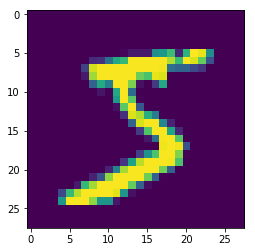

In [4]:
plt.imshow(x_train[0])

In [0]:
xtrain = x_train.reshape(x_train.shape[0], 28, 28,1)
xtest = x_test.reshape(x_test.shape[0], 28, 28,1)

In [0]:
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')

In [0]:
xtrain /= 255.0
xtest /= 255.0

In [0]:
ytrain = np_utils.to_categorical(y_train, 10)
ytest = np_utils.to_categorical(y_test, 10)

In [9]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(16, 3, 3, input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(10, 1, 1))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.4))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(32, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(10, 1, 1))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.4))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(32, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(16, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(10, 1, 1))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1))`


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 10)        170       
_________________________________________________________________
batch_normalization_2 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
activation_2 (Activation)    (None, 26, 26, 10)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 10)        0         
__________

In [0]:
sgd = keras.optimizers.sgd(lr=0.001)
model.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics=['accuracy'])

In [12]:
model.fit(xtrain, ytrain, batch_size=32, nb_epoch=30, verbose=1, validation_data=(xtest, ytest))

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 21s 345us/step - loss: 1.6048 - acc: 0.5456 - val_loss: 1.6682 - val_acc: 0.4956
Epoch 2/30
60000/60000 [==============================] - 17s 287us/step - loss: 1.0202 - acc: 0.8004 - val_loss: 1.3873 - val_acc: 0.6394
Epoch 3/30
60000/60000 [==============================] - 17s 286us/step - loss: 0.7801 - acc: 0.8589 - val_loss: 1.2075 - val_acc: 0.7085
Epoch 4/30
60000/60000 [==============================] - 19s 313us/step - loss: 0.6442 - acc: 0.8841 - val_loss: 1.0568 - val_acc: 0.7639
Epoch 5/30
60000/60000 [==============================] - 18s 295us/step - loss: 0.5489 - acc: 0.8993 - val_loss: 0.9498 - val_acc: 0.7878
Epoch 6/30
60000/60000 [==============================] - 18s 299us/step - loss: 0.4858 - acc: 0.9090 - val_loss: 0.8958 - val_acc: 0.7869
Epoch 7/30
60000/60000 [==============================] - 17s 286us/step - loss: 0.4390 - acc: 0.9165 - val_loss: 0.

In [13]:
model.fit(xtrain, ytrain, batch_size=32, nb_epoch=20, verbose=1, validation_data=(xtest, ytest))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
  608/60000 [..............................] - ETA: 17s - loss: 0.1954 - acc: 0.9457

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 18s 307us/step - loss: 0.1801 - acc: 0.9568 - val_loss: 0.2782 - val_acc: 0.9386
Epoch 2/20
60000/60000 [==============================] - 17s 288us/step - loss: 0.1792 - acc: 0.9568 - val_loss: 0.2832 - val_acc: 0.9350
Epoch 3/20
60000/60000 [==============================] - 17s 288us/step - loss: 0.1774 - acc: 0.9563 - val_loss: 0.2690 - val_acc: 0.9394
Epoch 4/20
60000/60000 [==============================] - 18s 294us/step - loss: 0.1755 - acc: 0.9586 - val_loss: 0.2696 - val_acc: 0.9390
Epoch 5/20
60000/60000 [==============================] - 18s 296us/step - loss: 0.1675 - acc: 0.9601 - val_loss: 0.2776 - val_acc: 0.9352
Epoch 6/20
60000/60000 [==============================] - 18s 307us/step - loss: 0.1676 - acc: 0.9602 - val_loss: 0.2521 - val_acc: 0.9435
Epoch 7/20
60000/60000 [==============================] - 18s 292us/step - loss: 0.1645 - acc: 0.9607 - val_loss: 0.2352 - val_acc: 0.9497
Epoch 8/20
60000/60000 [==============

In [16]:
model.fit(xtrain, ytrain, batch_size=32, nb_epoch=40, verbose=1, validation_data=(xtest, ytest))

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
  576/60000 [..............................] - ETA: 19s - loss: 0.1560 - acc: 0.9618

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 17s 290us/step - loss: 0.1408 - acc: 0.9652 - val_loss: 0.2059 - val_acc: 0.9521
Epoch 2/40
60000/60000 [==============================] - 19s 309us/step - loss: 0.1385 - acc: 0.9660 - val_loss: 0.1933 - val_acc: 0.9568
Epoch 3/40
60000/60000 [==============================] - 18s 300us/step - loss: 0.1359 - acc: 0.9676 - val_loss: 0.1825 - val_acc: 0.9610
Epoch 4/40
60000/60000 [==============================] - 17s 290us/step - loss: 0.1375 - acc: 0.9663 - val_loss: 0.1703 - val_acc: 0.9632
Epoch 5/40
60000/60000 [==============================] - 17s 289us/step - loss: 0.1330 - acc: 0.9675 - val_loss: 0.1808 - val_acc: 0.9603
Epoch 6/40
60000/60000 [==============================] - 19s 310us/step - loss: 0.1302 - acc: 0.9689 - val_loss: 0.1767 - val_acc: 0.9618
Epoch 7/40
60000/60000 [==============================] - 17s 287us/step - loss: 0.1276 - acc: 0.9682 - val_loss: 0.1716 - val_acc: 0.9637
Epoch 8/40
60000/60000 [==============

In [0]:
score = model.evaluate(xtest, ytest, verbose=0)

In [18]:
print(score)

[0.13149870568215846, 0.9694]
